# Imports

In [86]:
# https://realpython.com/np-linspace-numpy
%load_ext blackcellmagic

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline



In [27]:
import numpy as np

x_ = np.linspace(-5, 5, 5)
y_ = np.linspace(0, 5, 4)

In [28]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)

In [34]:
nx, ny = (3, 2)
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)
xv, yv = np.meshgrid(x, y)
xv

array([[0. , 0.5, 1. ],
       [0. , 0.5, 1. ]])

In [35]:
yv

array([[0., 0., 0.],
       [1., 1., 1.]])

In [36]:
xv, yv = np.meshgrid(x, y, sparse=True)

In [37]:
xv

array([[0. , 0.5, 1. ]])

In [38]:
yv

array([[0.],
       [1.]])

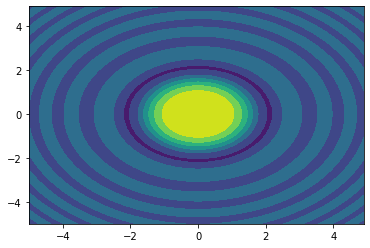

In [39]:
x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
xx, yy = np.meshgrid(x, y, sparse=True)

z = np.sin(xx**2 + yy**2) / (xx**2 + yy**2)
h = plt.contourf(x, y, z)
plt.show()

# From RealPython

https://realpython.com/np-linspace-numpy/

In [46]:
x_ = np.linspace(-5, 5, 100)
y_ = np.linspace(-5, 5, 100)

X, Y = np.meshgrid(x_, y_)

print(x_.shape, y_.shape)
print(X.shape, Y.shape)

(100,) (100,)
(100, 100) (100, 100)


In [47]:
gaussian = np.exp(-((X**2) / 2 + (Y**2) / 2))

In [45]:
gaussian

array([[1.38879439e-11, 1.63737713e-07, 3.72665317e-06, 1.63737713e-07,
        1.38879439e-11],
       [1.63737713e-07, 1.93045414e-03, 4.39369336e-02, 1.93045414e-03,
        1.63737713e-07],
       [3.72665317e-06, 4.39369336e-02, 1.00000000e+00, 4.39369336e-02,
        3.72665317e-06],
       [1.63737713e-07, 1.93045414e-03, 4.39369336e-02, 1.93045414e-03,
        1.63737713e-07],
       [1.38879439e-11, 1.63737713e-07, 3.72665317e-06, 1.63737713e-07,
        1.38879439e-11]])

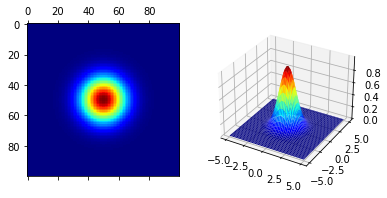

In [51]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()

ax = fig.add_subplot(121)
# Show matrix in 2D
ax.matshow(gaussian, cmap='jet')

ax = fig.add_subplot(122, projection='3d')
# Show 3D surface
ax.plot_surface(X, Y, gaussian, cmap='jet')
plt.show()

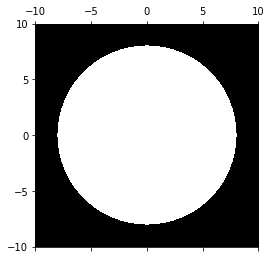

In [58]:

x_ = np.linspace(-10, 10, 1000)
y_ = np.linspace(-10, 10, 1000)

X, Y = np.meshgrid(x_, y_)

radius = 8
disk_mask = (X ** 2) + (Y ** 2) < radius ** 2

plt.matshow(disk_mask, cmap="gray", extent=[-10, 10, -10, 10])
plt.show()


# Logarithmic spaces

In [60]:
np.logspace(0, 4, 5)

array([1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04])

In [61]:
np.logspace(0, 4, 5, base=np.e)

array([ 1.        ,  2.71828183,  7.3890561 , 20.08553692, 54.59815003])

In [62]:
np.logspace(0, 4, 5, base=2)

array([ 1.,  2.,  4.,  8., 16.])

In [63]:
np.logspace(0, 4, 5, base=3)

array([ 1.,  3.,  9., 27., 81.])

# Other nonlinear ranges

In [64]:
x_ = np.linspace(1, 10, 10)
x_

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [65]:
x_ ** 2

array([  1.,   4.,   9.,  16.,  25.,  36.,  49.,  64.,  81., 100.])

# Simulate an orbiting planet

In [68]:
sampling = 50
R = 50

x_ = R * np.linspace(-1, 1, sampling)


y_ = np.sqrt(R**2 - x_**2)

x_return = x_[len(x_) - 2: 0: -1] # same as x_, but w/o the endpoints
y_return = - np.sqrt(R**2 - x_return**2)


x_ = np.concatenate((x_, x_return))
y_ = np.concatenate((y_, y_return))

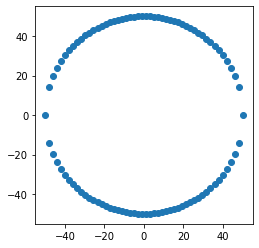

In [77]:
plt.scatter(x_, y_)
plt.axis('square')  # set to square aspect ratio
plt.show()

In [71]:
import matplotlib.animation

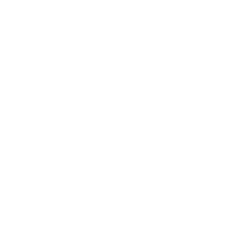

In [89]:
fig, ax = plt.subplots()
ax.set_aspect("equal")
ax.set_axis_off()

# Images are stored in a list to animate later
images = []

for x_coord, y_coord in zip(x_, y_):

    img = ax.scatter(x_coord, y_coord, s=250, c="r")
    # add the sun
    img2 = ax.scatter(0, 0, s=1000, c="y")
    images.append([img, img2])

animation = matplotlib.animation.ArtistAnimation(fig, images, interval=2.5, blit=True)
plt.show()

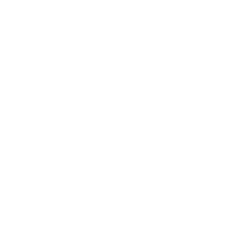

In [90]:
import matplotlib.animation

# Create a figure and axis handle, set axis to
# an equal aspect (square), and turn the axes off
fig, ax = plt.subplots()
ax.set_aspect("equal")
ax.set_axis_off()

# Images are generated and stored in a list to animate later
images = []
for x_coord, y_coord in zip(x_, y_):
    # Scatter plot each point using a dot of size 250 and color red
    img = ax.scatter(x_coord, y_coord, s=250, c="r")
    # Let's also put a large yellow sun in the middle
    img2 = ax.scatter(0, 0, s=1000, c="y")
    images.append([img, img2])

# The animation can now be created using ArtistAnimation
animation = matplotlib.animation.ArtistAnimation(fig, images, interval=2.5, blit=True)
plt.show()

# Let's make the points uniformly spaced around the circle

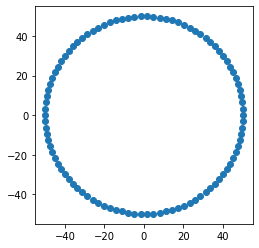

In [98]:
# transform from linear space to nonlinear space
x_ = R * np.cos(np.linspace(- np.pi, 0, sampling))
x_return = x_[len(x_)-2: 0: -1]

y_ = np.sqrt(R**2 - x_**2)
y_return = -np.sqrt(R**2 - x_return**2)

x_ = np.concatenate((x_, x_return))
y_ = np.concatenate((y_, y_return))

plt.scatter(x_, y_)
plt.axis('square')
plt.show()